# PART 4: Clustering Analysis     
## Cluster Neighborhoods on New York Hospital Beds per Hundred

In [1]:
import pandas as pd
import numpy as np
# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import folium # map rendering library
import matplotlib.pyplot as plt
%matplotlib inline
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
from geopy.geocoders import Nominatim

print('Libraries imported.')

Libraries imported.


## Import Data

In [11]:
df = pd.read_csv('data_output/final_df_for_clustering.csv')
df.head()

,Borough,Neighborhood,Latitude,Longitude,Population,Intensive Care Beds,Medical / Surgical Beds,Total Beds,Intensive Care Bed Per Hundred People,Bed Per Hundred People
0,Manhattan,Marble Hill,40.876551,-73.910660,9481.0,12,71,103,0.126569,1.086383
1,Bronx,Woodlawn,40.898273,-73.867315,42483.0,16,206,321,0.037662,0.755596
2,Bronx,Norwood,40.877224,-73.879391,40494.0,80,776,1169,0.197560,2.886847
3,Bronx,Pelham Parkway,40.857413,-73.854756,30073.0,22,304,421,0.073155,1.399927
4,Bronx,Morris Heights,40.847898,-73.919672,36779.0,28,271,444,0.076130,1.207211


## Visulize Data

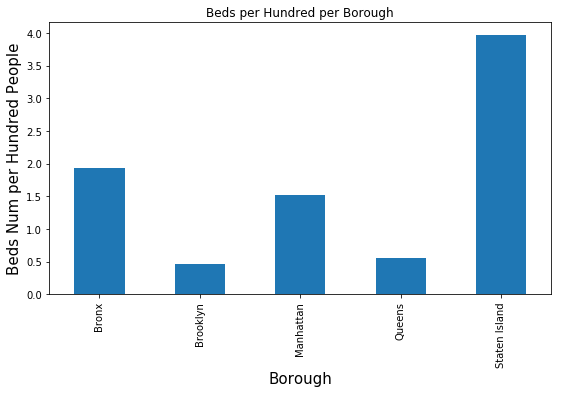

In [3]:
plt.figure(figsize=(9, 5))
plt.title('Beds per Hundred per Borough')
plt.xlabel('Borough', fontsize=15)
plt.ylabel('Beds Num per Hundred People', fontsize=15)
a = (df.groupby('Borough')['Total Beds'].sum()*100)/ (df.groupby('Borough')['Population'].sum())
a.plot(kind = 'bar')

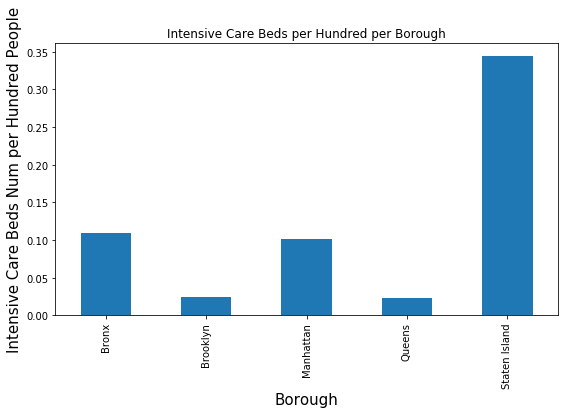

In [10]:
plt.figure(figsize=(9, 5))
plt.title('Intensive Care Beds per Hundred per Borough')
plt.xlabel('Borough', fontsize=15)
plt.ylabel('Intensive Care Beds Num per Hundred People', fontsize=15)
a = (df.groupby('Borough')['Intensive Care Beds'].sum()*100)/ (df.groupby('Borough')['Population'].sum())
a.plot(kind = 'bar')

## Cluster Neighborhoods

### Slice dataset for clustering

In [12]:
df_for_clustering = df[['Population','Intensive Care Bed Per Hundred People','Bed Per Hundred People']]
df_for_clustering.head()

,Population,Intensive Care Bed Per Hundred People,Bed Per Hundred People
0,9481.0,0.126569,1.086383
1,42483.0,0.037662,0.755596
2,40494.0,0.197560,2.886847
3,30073.0,0.073155,1.399927
4,36779.0,0.076130,1.207211


### Normalize data

In [13]:
# Normalizing data
df_for_clustering = StandardScaler().fit_transform(df_for_clustering)
df_for_clustering

array([[-1.16536421e+00, -5.55855351e-03, -2.57422106e-01],
       [-4.72264053e-01, -3.03384651e-01, -3.60820867e-01],
       [-5.14036558e-01,  2.32252645e-01,  3.05374488e-01],
       [-7.32895921e-01, -1.84487105e-01, -1.59413354e-01],
       [-5.92058104e-01, -1.74520984e-01, -2.19653391e-01],
       [-4.53131448e-01,  1.10828260e-01,  1.44221135e-01],
       [-4.52522397e-01, -3.21544775e-01, -3.94008221e-01],
       [-8.41265013e-01,  3.63781933e-01,  8.05749688e-01],
       [-1.01032920e+00,  8.69473554e-02,  4.87387929e-01],
       [-1.11390989e+00, -4.29547811e-01, -7.52346722e-03],
       [ 1.82159041e+00, -4.11882640e-01, -5.54974664e-01],
       [ 1.82159041e+00, -4.11882640e-01, -5.54974664e-01],
       [ 1.28174011e+00, -3.65740793e-01, -5.06706234e-01],
       [-7.46274043e-01, -1.79183950e-01, -2.03039284e-01],
       [-7.46274043e-01, -1.79183950e-01, -2.03039284e-01],
       [-6.17932275e-01, -2.69343676e-01, -3.27925827e-01],
       [ 1.63877007e+00, -3.99094461e-01

**Let's try use 5 clusters first**

In [14]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_for_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:20]

array([4, 3, 4, 4, 4, 4, 3, 0, 4, 4, 1, 1, 1, 4, 4, 4, 1, 1, 0, 3],
      dtype=int32)

**Find the optimal number of clusters by elbow method**

In [15]:
# Now we are going to use k-means clustering to partition data in k partitions
# We are going to use elbow method to find the optimum number of cluster

def plot_kmeans(dataset):
    obs = dataset.copy()
    silhouette_score_values = list()
    number_of_clusters = range(3, 30)
    for i in number_of_clusters:
        kmeans = KMeans(i, init='k-means++', n_init=10,
                            max_iter=300, tol=0.0001, random_state=10)
        
        labels = kmeans.fit(obs).labels_
        silhouette_score_values.append(metrics.silhouette_score(
            obs, labels, metric='euclidean', random_state=0))

    plt.plot(number_of_clusters, silhouette_score_values)
    plt.title("Silhouette Score vs Numbers of Clusters ")
    

    optimum_number_of_components = number_of_clusters[silhouette_score_values.index(
        max(silhouette_score_values))]
    print("Optimal number of components is:", optimum_number_of_components)

Optimal number of components is: 4


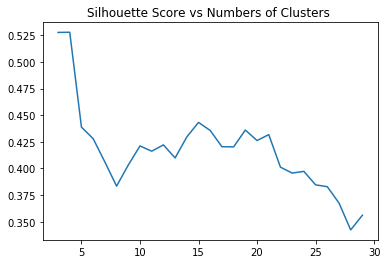

In [16]:
plot_kmeans(df_for_clustering)

In [17]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_for_clustering)
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 1, 1, 1, 3, 3, 3, 1, 1, 0, 3, 3, 3,
       1, 0, 3, 1, 1, 3, 3, 3, 1, 1, 3, 1, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 0, 1], dtype=int32)

In [18]:
# Combining cluster data with dataframe
df.insert(0, 'Cluster Label', kmeans.labels_)
df.head(20)

,Cluster Label,Borough,Neighborhood,Latitude,Longitude,Population,Intensive Care Beds,Medical / Surgical Beds,Total Beds,Intensive Care Bed Per Hundred People,Bed Per Hundred People
0,3,Manhattan,Marble Hill,40.876551,-73.910660,9481.0,12,71,103,0.126569,1.086383
1,3,Bronx,Woodlawn,40.898273,-73.867315,42483.0,16,206,321,0.037662,0.755596
2,3,Bronx,Norwood,40.877224,-73.879391,40494.0,80,776,1169,0.197560,2.886847
3,3,Bronx,Pelham Parkway,40.857413,-73.854756,30073.0,22,304,421,0.073155,1.399927
4,3,Bronx,Morris Heights,40.847898,-73.919672,36779.0,28,271,444,0.076130,1.207211
5,3,Bronx,Fordham,40.860997,-73.896427,43394.0,70,593,1029,0.161313,2.371296
6,3,Bronx,East Tremont,40.842696,-73.887356,43423.0,14,151,282,0.032241,0.649425
7,0,Bronx,Melrose,40.819754,-73.909422,24913.0,59,520,1118,0.236824,4.487617
8,0,Bronx,Morrisania,40.823592,-73.901506,16863.0,26,250,585,0.154184,3.469134
9,3,Bronx,Pelham Bay,40.850641,-73.832074,11931.0,0,225,225,0.000000,1.885844


## Examine Clusters

**Cluster 1**

In [40]:
df.loc[df['Cluster Label'] == 0]

,Cluster Label,Borough,Neighborhood,Latitude,Longitude,Population,Intensive Care Beds,Medical / Surgical Beds,Total Beds,Intensive Care Bed Per Hundred People,Bed Per Hundred People
7,0,Bronx,Melrose,40.819754,-73.909422,24913.0,59,520,1118,0.236824,4.487617
8,0,Bronx,Morrisania,40.823592,-73.901506,16863.0,26,250,585,0.154184,3.469134
18,0,Brooklyn,Windsor Terrace,40.656946,-73.980073,20988.0,40,560,839,0.190585,3.997522
23,0,Brooklyn,Carroll Gardens,40.680540,-73.994654,12853.0,29,393,535,0.225628,4.162452
44,0,Staten Island,Stapleton,40.626928,-74.077902,37669.0,162,899,1445,0.430062,3.836046
46,0,Staten Island,South Beach,40.580247,-74.079553,8575.0,46,356,736,0.536443,8.583090
47,0,Manhattan,Turtle Bay,40.752042,-73.967708,24856.0,107,585,1392,0.430480,5.600257


**Cluster 2**

In [39]:
df.loc[df['Cluster Label'] == 1]

,Cluster Label,Borough,Neighborhood,Latitude,Longitude,Population,Intensive Care Beds,Medical / Surgical Beds,Total Beds,Intensive Care Bed Per Hundred People,Bed Per Hundred People
10,1,Brooklyn,Bensonhurst,40.611009,-73.995180,151705.0,8,183,204,0.005273,0.134472
11,1,Brooklyn,Bensonhurst,40.611009,-73.995180,151705.0,8,183,204,0.005273,0.134472
12,1,Brooklyn,Sunset Park,40.645103,-74.010316,126000.0,24,128,364,0.019048,0.288889
16,1,Brooklyn,Crown Heights,40.670829,-73.943291,143000.0,13,104,287,0.009091,0.200699
17,1,Brooklyn,Crown Heights,40.670829,-73.943291,143000.0,13,104,287,0.009091,0.200699
22,1,Brooklyn,Bushwick,40.698116,-73.925258,129239.0,16,244,324,0.012380,0.250698
25,1,Brooklyn,Borough Park,40.633131,-73.990498,106357.0,40,448,711,0.037609,0.668503
26,1,Brooklyn,Prospect Lefferts Gardens,40.658420,-73.954899,99287.0,27,263,466,0.027194,0.469346
30,1,Manhattan,East Harlem,40.792249,-73.944182,115921.0,191,1682,2654,0.164767,2.289490
31,1,Manhattan,Upper East Side,40.775639,-73.960508,124231.0,15,476,632,0.012074,0.508730


**Cluster 3**

In [41]:
df.loc[df['Cluster Label'] == 2, ]

,Cluster Label,Borough,Neighborhood,Latitude,Longitude,Population,Intensive Care Beds,Medical / Surgical Beds,Total Beds,Intensive Care Bed Per Hundred People,Bed Per Hundred People
35,2,Manhattan,Murray Hill,40.748303,-73.978332,10864.0,221,1155,2270,2.034242,20.894698


**Cluster 4**

In [43]:
df.loc[df['Cluster Label'] == 3, ]

,Cluster Label,Borough,Neighborhood,Latitude,Longitude,Population,Intensive Care Beds,Medical / Surgical Beds,Total Beds,Intensive Care Bed Per Hundred People,Bed Per Hundred People
0,3,Manhattan,Marble Hill,40.876551,-73.910660,9481.0,12,71,103,0.126569,1.086383
1,3,Bronx,Woodlawn,40.898273,-73.867315,42483.0,16,206,321,0.037662,0.755596
2,3,Bronx,Norwood,40.877224,-73.879391,40494.0,80,776,1169,0.197560,2.886847
3,3,Bronx,Pelham Parkway,40.857413,-73.854756,30073.0,22,304,421,0.073155,1.399927
4,3,Bronx,Morris Heights,40.847898,-73.919672,36779.0,28,271,444,0.076130,1.207211
5,3,Bronx,Fordham,40.860997,-73.896427,43394.0,70,593,1029,0.161313,2.371296
6,3,Bronx,East Tremont,40.842696,-73.887356,43423.0,14,151,282,0.032241,0.649425
9,3,Bronx,Pelham Bay,40.850641,-73.832074,11931.0,0,225,225,0.000000,1.885844
13,3,Brooklyn,Gravesend,40.595260,-73.973471,29436.0,22,213,371,0.074738,1.260361
14,3,Brooklyn,Gravesend,40.595260,-73.973471,29436.0,22,213,371,0.074738,1.260361


## Visulizing the Geo Clusters

Finally, let's visualize the resulting clusters.

**Use geopy library to get the latitude and longitude values of New York City.**

In [52]:
address = 'New York City, NY'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

/Users/li/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.20.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [84]:
#create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
num_clusters = 4
colours = ['red', 'green', 'blue','purple']
x = np.arange(num_clusters)
ys = [i+x+(i*x)**2 for i in range(num_clusters)]
colours_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, bor, nei, cluster, bed_per_100_people in zip(
    df['Latitude'], df['Longitude'], df['Borough'],df['Neighborhood'], 
    df['Cluster Label'],df['Bed Per Hundred People']):
    label = folium.Popup(' Cluster ' + str(cluster)+': ' + str(bor) + "-" + str(nei) + ": "+str(round(bed_per_100_people,3)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=colours[cluster],
        fill=True,
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [85]:
map_clusters.save('maps_output/bed_per_hundred_map.html')

In [80]:
#create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
num_clusters = 4
colours = ['red', 'green', 'blue','purple']
x = np.arange(num_clusters)
ys = [i+x+(i*x)**2 for i in range(num_clusters)]
colours_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, bor, nei, cluster, int_bed_per_100_people in zip(
    df['Latitude'], df['Longitude'], df['Borough'],df['Neighborhood'], 
    df['Cluster Label'], df['Intensive Care Bed Per Hundred People']):
    label = folium.Popup(' Cluster ' + str(cluster)+': ' + str(bor) + "-" + str(nei) + ": "+str(round(int_bed_per_100_people,3)), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=10,
        popup=label,
        color=colours[cluster],
        fill=True,
        fill_color=colours[cluster],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [83]:
map_clusters.save('maps_output/intensive_beds_per_hundred.html')